# **Module. Clustering Algorithms using Python**

In this module, we will learn to implement three clustering methods: K-means algorithm, hierarchical clustering, and mixture models using the popular Scikit-Learn library. 

## **I. K-means Clustering**



K-means is one of the theoretically simplest and most natural approach to clustering. These traits also make implementing K-means clustering from scratch in Python reasonably straightforward, even for novice programmers and data scientists and is a recommended exercise for the interested learner. However, here, we will employ the Scikit-Learn library and use the in-built K-means clustering algorithm.

The first step, as always, is to import all relevant libraries and algorithms.

In [2]:
# Importing all relevant libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Measuring the performance of an unsupervised learning algorithm is challenging. The performance of a supervised learning algorithm can be easily measured by studying how well it performs at predicting the value of interest among the observations held out in a test set. 

On the other hand, with unsupervised learning, since we do not know the “right answer” or “true label” for any observation, it is not possible to easily check the performance of an unsupervised learning algorithm. 

Therefore, here, since we are encountering algorithms for clustering for the very first time, it is instructionally useful to employ a dataset for which we know the number of pre-existing clusters i.e. and the groups to which each observation belongs to. But we will pretend that we do not know these groups while running the clustering algorithm. We will then see if our clustering algorithm is able to recover these clusters. 

The dataset that we will be using is the popular `iris` flower dataset. The iris flower dataset is a multivariate data set introduced by the renowned British statistician and biologist [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in 1936. The data set consists of a total of 150 samples, 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 
 
Let us now put ourselves in the shoes of early researchers. Given the data of the four features for each of the 150 samples, can we cluster the samples to identify that there are three different species of the Iris flower?

The dataset is provided in `iris.csv`. Import the dataset and read the first 10 entries to confirm the data has been read in correctly and to get an idea of how the dataset looks like. 

In [9]:
df = pd.read_csv('iris.csv')  # Importing the dataset

df.head(10)             # The first 10 entries of the dataset

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


There are four features: sepal length, sepal width, petal length, and petal width. Since, we are not going to work with the variety, let us remove it from future analysis. We are only going to cluster the observations based on the four features. 

We use the `iloc` function on the data and extract the four features indexed by the columns (0,1,2,3).

In [10]:
x = df.iloc[:, [0,1,2,3]].values    # Extract only the first four columns

Let us now implement the K-means algorithm with the number of clusters set at 3. 

In [11]:
kmeans3 = KMeans(n_clusters=3)      # K-means with 3 clusters
y_kmeans3 = kmeans3.fit_predict(x)  # Calling K-means with 3 clusters on the data

print(y_kmeans3)                    # Prints the cluster to which each observation belongs to

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Let us now compare how well the K-means clustering algorithm performed at identifying the three clusters i.e. the three different species in the data as compared to the true data. Note that in practical applications, we will not always have the luxury of being able to perform this analysis as easily. 

However, in practical applications, we may still be able to perform such "external validation" by manually checking observations and studying whether the clusters identified by the algorithm correspond to meaningful groupings.

In our example, let us add another column `Labels` to the original dataframe `df` denoting the cluster to which each observation has been assigned to by the K-means algorithm. 

In [12]:
df['Labels'] = y_kmeans3
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,Labels
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


Let us now display all the rows and columns in the dataframe and visually inspect how well our clustering algorithm has performed. 

In [13]:
# Allows for changing display of number of columns and rows displayed in Jupyter
# notebooks. If the number of rows is set too low, it will lead to a truncated 
# display of the data.  

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
print(df)

     sepal.length  sepal.width  petal.length  petal.width     variety  Labels
0             5.1          3.5           1.4          0.2      Setosa       0
1             4.9          3.0           1.4          0.2      Setosa       0
2             4.7          3.2           1.3          0.2      Setosa       0
3             4.6          3.1           1.5          0.2      Setosa       0
4             5.0          3.6           1.4          0.2      Setosa       0
5             5.4          3.9           1.7          0.4      Setosa       0
6             4.6          3.4           1.4          0.3      Setosa       0
7             5.0          3.4           1.5          0.2      Setosa       0
8             4.4          2.9           1.4          0.2      Setosa       0
9             4.9          3.1           1.5          0.1      Setosa       0
10            5.4          3.7           1.5          0.2      Setosa       0
11            4.8          3.4           1.6          0.2      S

In conclusion, the K-means clustering on the data is able to perform reasonably well at identifying the species of each observation. In this exercise, we looked at a relatively straightforward and direct application of K-means clustering. However, K-means, and more generally, clustering algorithms can also be employed in more unconventional ways as we will see in another application of K-means clustering.

### **II. Another application of K-means clustering**



Now, we look at a more advanced application of K-means clustering to the problem of **image compression**. 

Formally, image compression is when digital images are compressed to reduce their cost of storage or transmission at the cost of resolution and image accuracy. A digital image is composed of several pixels of different colors. In a colored image, each pixel is of 3 bytes containing RGB (Red-Blue-Green) values with each value representing the intensity of the corresponding color. This means the size of digital images can be huge with a lot of space required to store these images. 

In our problem of image compression, K-means clustering will group similar colors together into clusters (say, K = 8 or 16) of different colors (RGB values). Now, the centroids of these K clusters will replace the multitude of color vectors in their respective clusters. Thus, we need to only store (i) the color intensity combinations of the K clusters, and (ii) the label for each pixel denoting which cluster the pixel belongs to. Image compression using clustering leverages the fact that many of the pixels in images will have similar or even identical colors.

Let us now import all relevant libraries.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # For plotting
import numpy as np

For this application, we will consider the image shown below which is from the `Scikit-Learn` datasets module. 

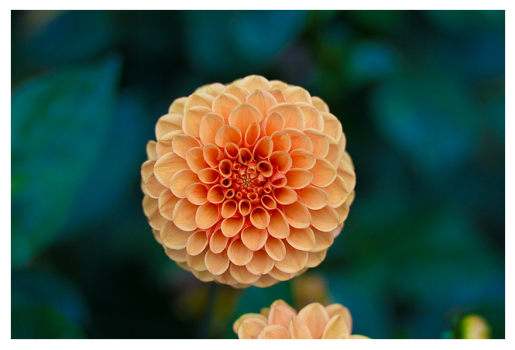

In [15]:
from sklearn.datasets import load_sample_image    # Datasets containing sample images in the scikit-learn library
flower = load_sample_image("flower.jpg")            # Loads a sample image flower.jpg
ax = plt.axes(xticks=[], yticks=[])               # Plot the image
ax.imshow(flower);

The image is stored in a three-dimensional array of height, width, RGB intensity. 

In [16]:
flower.shape

(427, 640, 3)

We will now reshape the image to transform it from a three-dimensional array to a two-dimensional array and store the RGB intensity to lie between 0 and 1 for convenience.

In [17]:
data = flower / 255.0                # Converts RGB intensity to a [0,1] scale
data = data.reshape(427 * 640, 3)   # Reshapes the image
data.shape

(273280, 3)

To understand the variety of pixel colors in the image, let us choose 10000 pixels and plot their colors. 

In [18]:
# Define a plot_pixels function 

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # Choose a random subset of pixels 

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    # Define the axes and markets on the figure
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

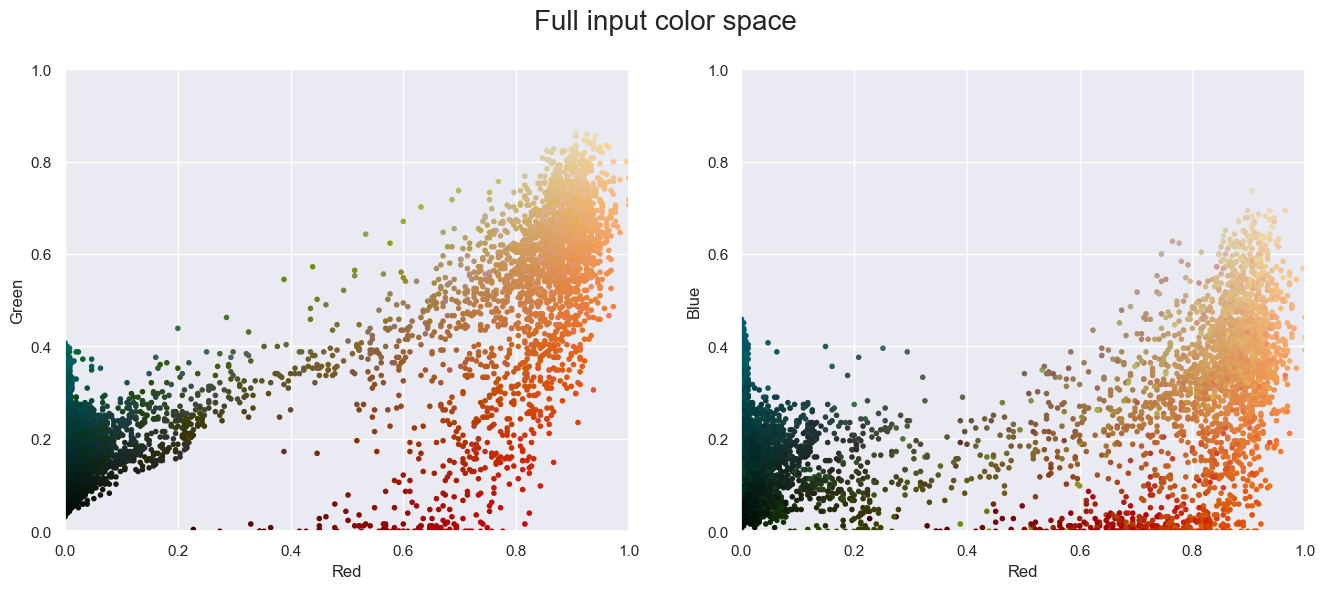

In [19]:
plot_pixels(data, title='Full input color space')


The entire input color space contains $256\cdot 256\cdot 256 = 16.77$ million colors.

In the previous application of K-means clustering, we looked at the standard K-means implementation in the Scikit-Learn library. The library also contains another faster variant of the K-means clustering algorithm, known as MiniBatchKMeans. It is a variant of the K-Means algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Given the size of our current example, we will employ this variant for efficiency. 

In practical examples, it may often be the case that we need to cluster large datasets and acquaintance with this variant will prove handy. 

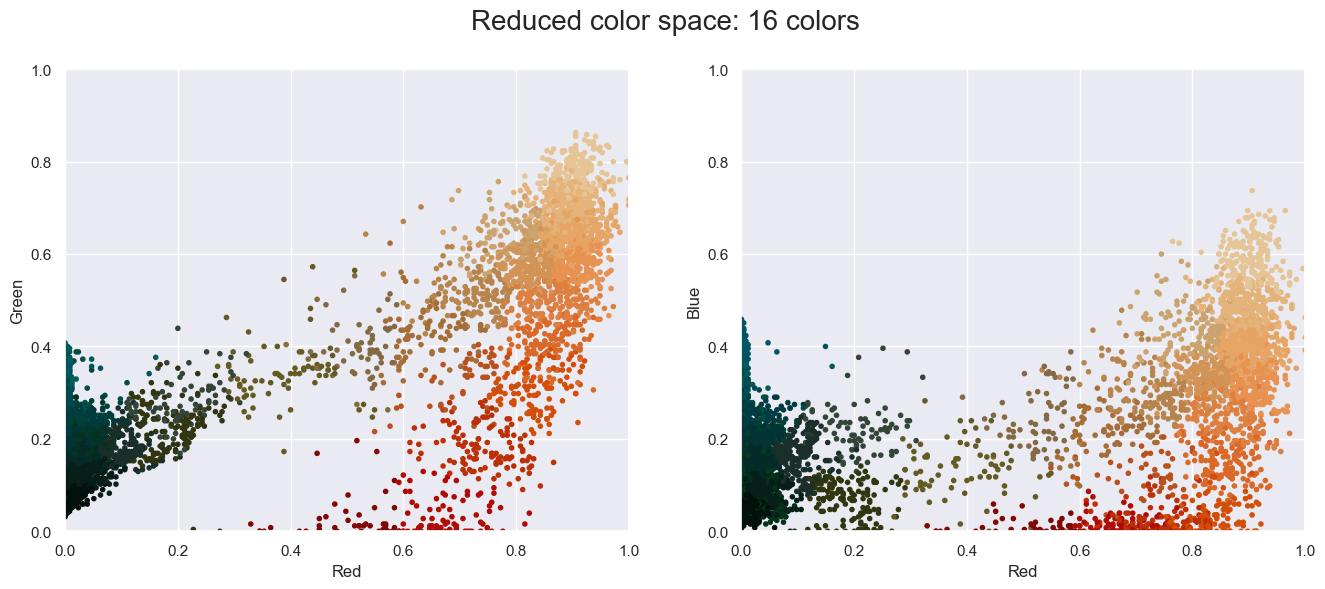

In [23]:
# Import and run the minibatchkmeans function from sklearn

from sklearn.cluster import MiniBatchKMeans

# Perform K-means with K = 16 

kmeans = MiniBatchKMeans(32)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

# Plot the reduced color space using the 16 colors 

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

As can be seen in the image above, each pixel has been assigned the color of its closest cluster center.

Now, let us look at how the original image compares with the reduced image with 16 colors after K-means clustering.

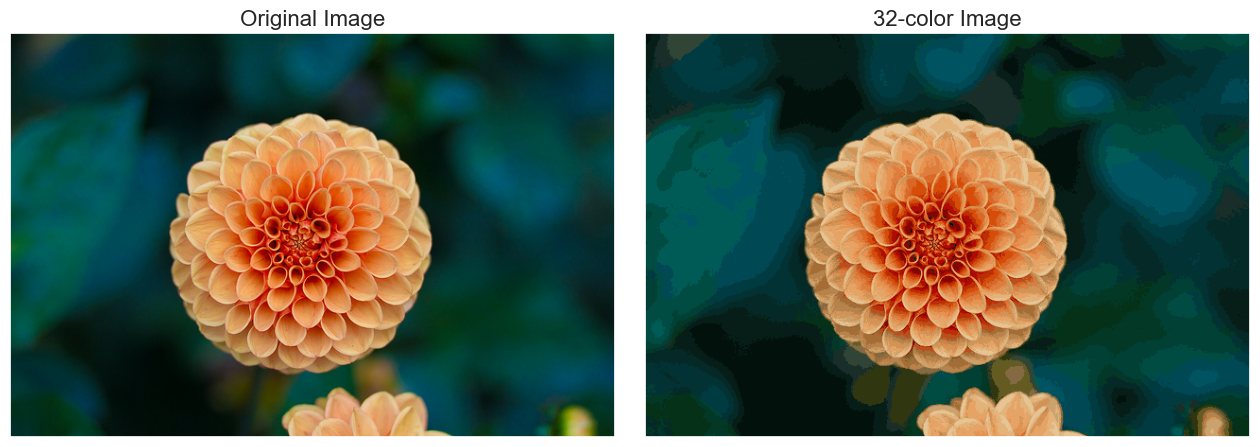

In [25]:
flower_recolored = new_colors.reshape(flower.shape) # Defines the recolored image

# Plots the original image and the recolored image for comparison

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('32-color Image', size=16);

The image on the right is instantly recognizable as the original image. Naturally, quite a bit of detail is lost in the right panel. However, the compression achieved is more than a million times. This application goes to show that K-means and clustering algorithms in general can be employed in very unconventional ways with stunning results.

## **II. Hierarchical Clustering**

Hierarchical clustering circumvents one of the key challenges of the K-means algorithm which is that the number of clusters in the data must be pre-specified. The "agglomerative" hierarchical clustering approach follows a simple building up approach: start with many small clusters and merge them together to create bigger clusters.

Let us now consider a simple example with made up data to understand how hierarchical clustering is implemented. Let us consider a set of observations with two feature values allowing us to plot them in a 2-D plot. Suppose the data points represented by a numpy array as follows:

In [26]:
# Import numpy 

import numpy as np

# Define the array of 15 observations, each with two feature values

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],
    [85,60],
    [71,58],
    [60,48],
    [80,55],
    [80,61],])

Let us now plot the 15 observations on a 2-D plot using `matplotlib`. The code snippet below plots the data points in the X numpy array and labels the observations from 1 to 15.

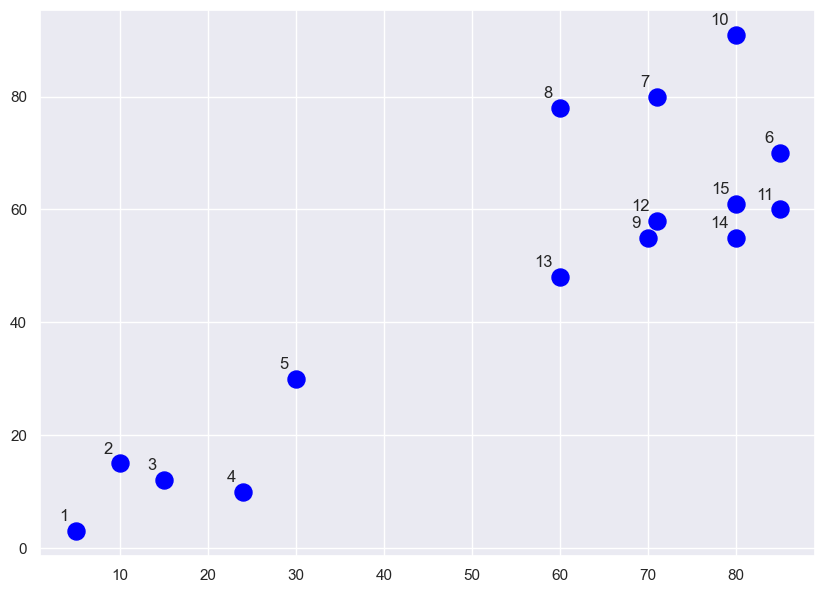

In [27]:
import matplotlib.pyplot as plt       # Import matplotlib

# Define figure characteristics

labels = range(1, 16)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], s = 150, label='True Position', color = 'blue')

# Labels the observations from 1 to 15

# Play around with the image features to understand the role of different elements

# The xytext(-5,5) specifies the position of the label wrt to the observation

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-5, 5),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

The reason we choose such a simple example to demonstrate the hierarchical clustering algorithm is because we can easily make out visually whether the algorithm is performing the job we set it out to do. Visually, in this dataset, it can be seen that there are three prominent clusters: one at the bottom left consisting of observations 1-5, and two clusters at the top right, one consisting of points 7,8 and 10, and another cluster consisting of points 6, 9, 11, 12, 13, 14, and 15. The two clusters in the top right also appear to naturally lie in a hierarchical fashion. That is, one can imagine a larger cluster consisting of all points from 6 to 15. 

Of course, in real-world applications,  datasets will be much larger numbering 1000s or sometimes millions of observations and certainly will have more than 2 features. It would be challenging to visually inspect the clustering in those situations. For instructional purposes, it is therefore ideal to learn the implementation on a simple dataset. 

In [31]:
# Import the (agglomerative) hierarchical clustering algorithm

from sklearn.cluster import AgglomerativeClustering

# Fit the clustering model to the data

# The Euclidean affinity argument tells the algorithm to compute the distance
# between two observations. 

# The linkage argument tells the algorithm to merge the two nearest clusters.

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1])

Let us now view how the hierarchical clustering algorithm separates the data into three clusters. 

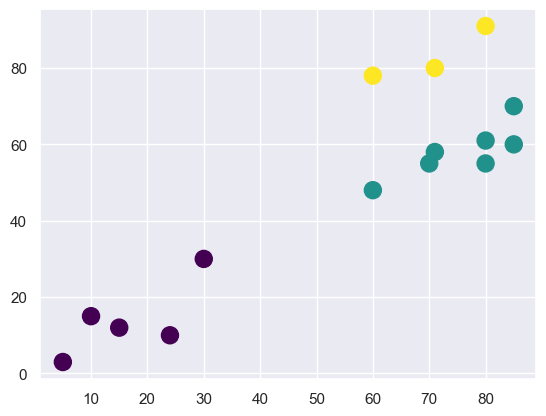

In [32]:
# Plots the two clusters using different colors 

# Refer to matplotlib documentation to learn alternative colormap options

plt.scatter(X[:,0],X[:,1], s = 150, c=cluster.labels_, cmap='viridis')


The algorithm has identified the three clusters we visually expected it to identify.

The output of a hierarchical clustering algorithm can be represented by a tree. Therefore, hierarchical clustering results in an interpretable tree-based representation of the observations, called a dendrogram.
Instead of providing one single clustering of the observations as in the case of the K-means algorithm, the hierarchical clustering algorithm provides a finer and more refined partition of the dataset. In the above code snippet, we were interested only in the top most hierarchy i.e. when the data is split into two clusters. Now, let us map out the complete tree representation, i.e. the dendogram. In order to do so, we will use the [`scipy` library](https://www.scipy.org/scipylib/), another useful library for advanced machine learning applications. 

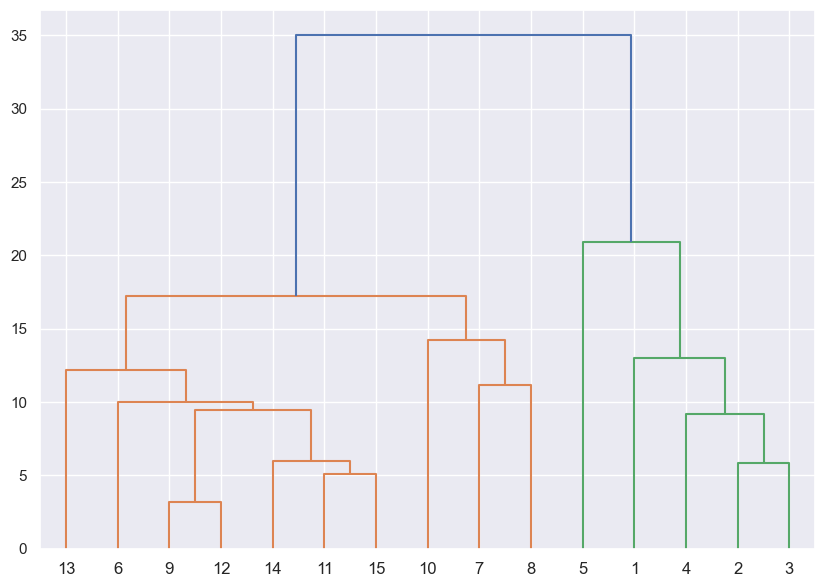

In [30]:
# Import from scipy the relevant functionalities 

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# The linkage matrix encoding the hierarchical clustering to render as a dendrogram.

linked = linkage(X, 'single')

# Labels on the plot 

labelList = range(1, 16)

# Displaying the plot

plt.figure(figsize=(10, 7))

# Orientation specifies whether the tree is displayed top-down or bottom-up

dendrogram(linked, 
            orientation='top',
            labels=labelList,
            show_leaf_counts=True)

plt.show()

The dendogram above provides the full information about the hierarchical clustering output. In this example, we looked at dummy data. However, even in practical applications, the output of the hierarchical clustering algorithm will be easy to interpret and analyze once we have the dendogram in front of us. The key advantage of this method is that it leaves the decision on the optimal number of clusters in the dataset to be a post hoc decision.  

## **III. Mixture Models**



The K-means algorithm is simple and powerful, but as with all simple models, it has its drawbacks. The first being that it is a **hard clustering** method, that is, it assigns each observation to one cluster or the other. In situations where there is a possibility of overlapping clusters, this is no longer a reasonable assumption. 

The second limitation of the K-means approach is that it assumes all data lying within a spherical or circular region around the centroids belong to the same cluster. This is because K-means is a **distance-based clustering** approach. This will lead to inaccurate clustering as we will demonstrate in this lab. Let us begin by importing the relevant libraries and the dataset `clustering_gmm.csv`. The dataset contains observations on the heights and weights of several individuals.

In [33]:
# Import pandas and read in the data 

import pandas as pd
data = pd.read_csv('clustering_gmm.csv')

# Inspect the head of the data to confirm data has been imported correctly

data.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


In [34]:
# Describe the data and obtain data summary

data.describe()

,Weight,Height
count,500.000000,500.000000
mean,61.270240,169.515781
std,5.196976,4.805095
min,50.433644,160.182164
25%,57.772791,166.607599
50%,61.961518,169.726252
75%,65.439332,172.837284
max,70.700456,178.894770


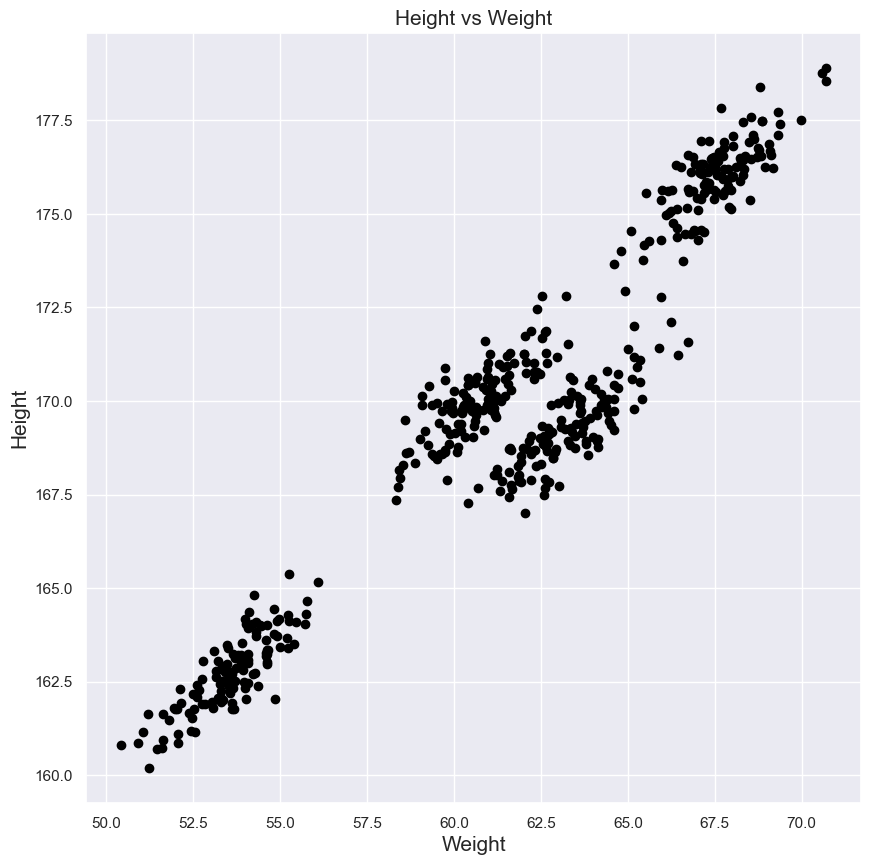

In [35]:
# Generates a scatter plot of the data

plt.figure(figsize=(10,10))
plt.scatter(data["Weight"],data["Height"], c = 'black')
plt.xlabel('Weight', fontsize = 15)
plt.ylabel('Height', fontsize = 15)
plt.title('Height vs Weight', fontsize = 15)
plt.show()

Visually, in the dataset, it appears that there is a strong correlation between height and weight as we would expect. Secondly, there appear to be 4 distinct clusters. Let us see if K-means is able to recover these 4 clusters. 

In [36]:
# Import KMeans algorithm and train it on the data for K = 4

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

# Store the predictions from K-means

pred = kmeans.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = pred
frame.columns = ['Weight', 'Height', 'cluster']

Let us view `frame` to confirm the cluster assignments have been assigned to each observation. 

In [37]:
# Inspect cluster assignments using head()

frame.head()

,Weight,Height,cluster
0,67.062924,176.086355,2
1,68.804094,178.388669,2
2,60.930863,170.284496,3
3,59.733843,168.691992,3
4,65.431230,173.763679,2


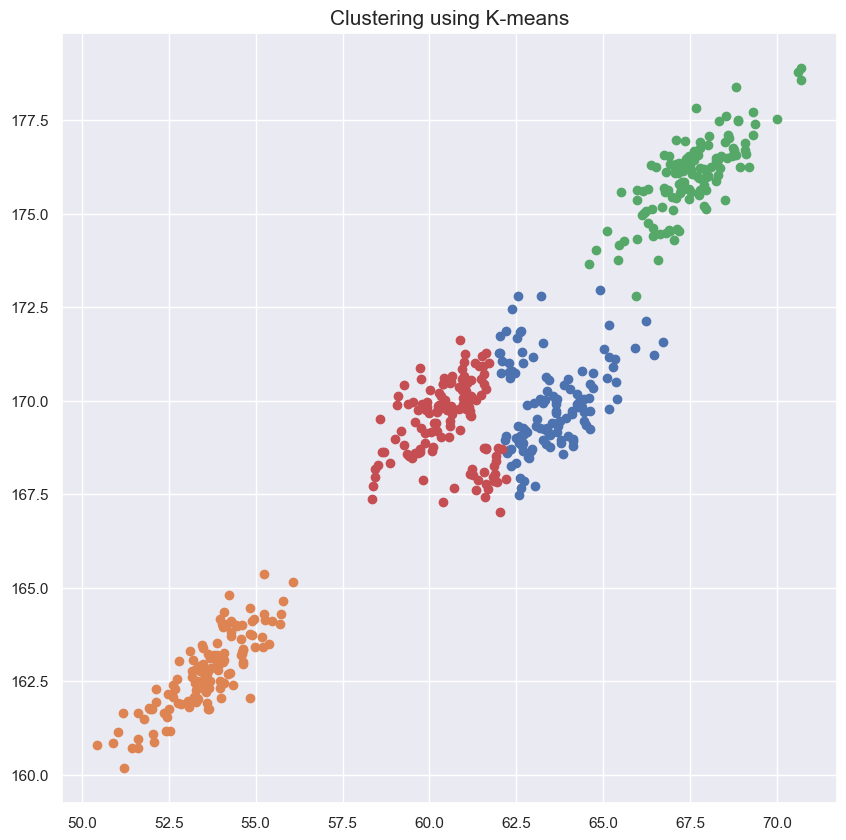

In [38]:
# Plotting results

plt.figure(figsize=(10,10))     # Sets size of figure

for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"])  # cmap assigns different colors to each cluster
plt.title('Clustering using K-means', fontsize = 15)             # sets title of plot
plt.show()

As seen above, the K-means algorithm fails to correctly identify the four clusters. As noted above, this failure of K-means stems from the fact that it is a distance based clustering algorithm. Mixture models offer a **distributed based clustering** approach. We will study the implementation of a (Gaussian) mixture model below and see whether it performs better than K-means at identifying the clusters in the data.

In [51]:
# Import pandas and read in the data 

import pandas as pd
data = pd.read_csv('clustering_gmm.csv')

Let us now use the Gaussian mixture function from sklearn and train it on our current dataset to obtain cluster assignments. 

In [52]:
# Import the mixture model, GaussianMixture and training it on the data

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data)

# Store the predictions of the mixture model

labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']


Let us view `frame` to confirm the cluster assignments have been assigned to each observation. 

In [53]:
frame.head()

,Weight,Height,cluster
0,67.062924,176.086355,3
1,68.804094,178.388669,3
2,60.930863,170.284496,2
3,59.733843,168.691992,2
4,65.431230,173.763679,3


/var/folders/1p/q_9hhzqs0yddpgkxqm_hvtbc0000gn/T/ipykernel_61002/532579963.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data["Weight"],data["Height"],cmap = 'viridis')


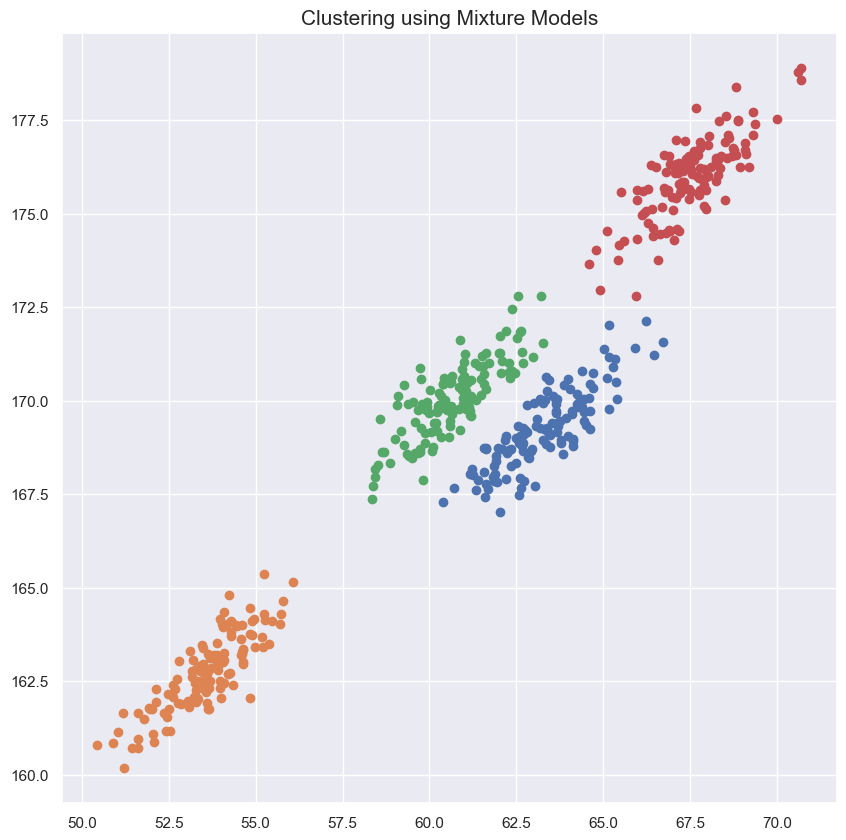

In [54]:
# Visualize the clusters

plt.figure(figsize=(10,10))
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],cmap = 'viridis')
plt.title('Clustering using Mixture Models', fontsize = 15)
plt.show()

## **IV. Quiz**




**Question 1.** What is the minimum number of variables (features) required to perform clustering on a dataset?

A. 0

B. 1

C. 2

D. 3

**Answer.** (B) We can cluster even on a single feature. 

**Question 2.** Is the following statement regarding clustering algorithms true or false. Explain. 

The results of a clustering algorithm can only be visualized when the clustering is done on 2 features. 

**Answer.** False. We can visualize clustering on one feature as well as clustering on three features (using 3-D plots). 

**Question 3.**  Is the following statement regarding clustering algorithms true or false. Explain.

We always cluster based on all the features available in the data, the algorithms can then decide whether to use a feature or not.

**Answer.** False. It is good practice to select relevant features and discard irrelevant features. It is also good practice to engineer new features by transforming or combining two or more existing features. Applying clustering algorithms to real data, as much of applied machine learning, is as much art as it is a science. 